In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.tree import plot_tree
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv("book1.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   S.No.                     20000 non-null  int64  
 1   Date                      20000 non-null  object 
 2   Temperature (Celsius)     20000 non-null  int64  
 3   Temperature (Kelvin)      20000 non-null  float64
 4   Temperature (Fahrenheit)  20000 non-null  float64
 5   Precipitation (mm)        20000 non-null  float64
 6   Wind Speed (km/h)         20000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 1.1+ MB


In [5]:
df.head()

,S.No.,Date,Temperature (Celsius),Temperature (Kelvin),Temperature (Fahrenheit),Precipitation (mm),Wind Speed (km/h)
0,1,01-01-10,-4,269.15,24.8,8.684371,18
1,2,02-01-10,-8,265.15,17.6,8.750701,12
2,3,03-01-10,14,287.15,57.2,5.885284,1
3,4,04-01-10,10,283.15,50.0,8.767013,41
4,5,05-01-10,27,300.15,80.6,8.662592,44


In [6]:
df.describe()

,S.No.,Temperature (Celsius),Temperature (Kelvin),Temperature (Fahrenheit),Precipitation (mm),Wind Speed (km/h)
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,9.984300,283.134300,49.971740,4.983424,24.892300
std,5773.647028,11.860607,11.860607,21.349092,2.882050,14.738964
min,1.000000,-10.000000,263.150000,14.000000,0.001016,0.000000
25%,5000.750000,0.000000,273.150000,32.000000,2.475521,12.000000
50%,10000.500000,10.000000,283.150000,50.000000,5.006267,25.000000
75%,15000.250000,20.000000,293.150000,68.000000,7.463667,38.000000
max,20000.000000,30.000000,303.150000,86.000000,9.999604,50.000000


In [7]:
corr = df[['Temperature (Celsius)', 'Precipitation (mm)']].corr()


In [ ]:
corr

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Temperature (Celsius)', y='Precipitation (mm)', alpha=0.5)
plt.title("Scatter plot of Temperature vs Precipitation")
plt.show()

In [8]:
avg_temp = df.groupby('Date')['Temperature (Celsius)'].mean()
avg_precip = df.groupby('Date')['Precipitation (mm)'].mean()


In [ ]:
avg_temp

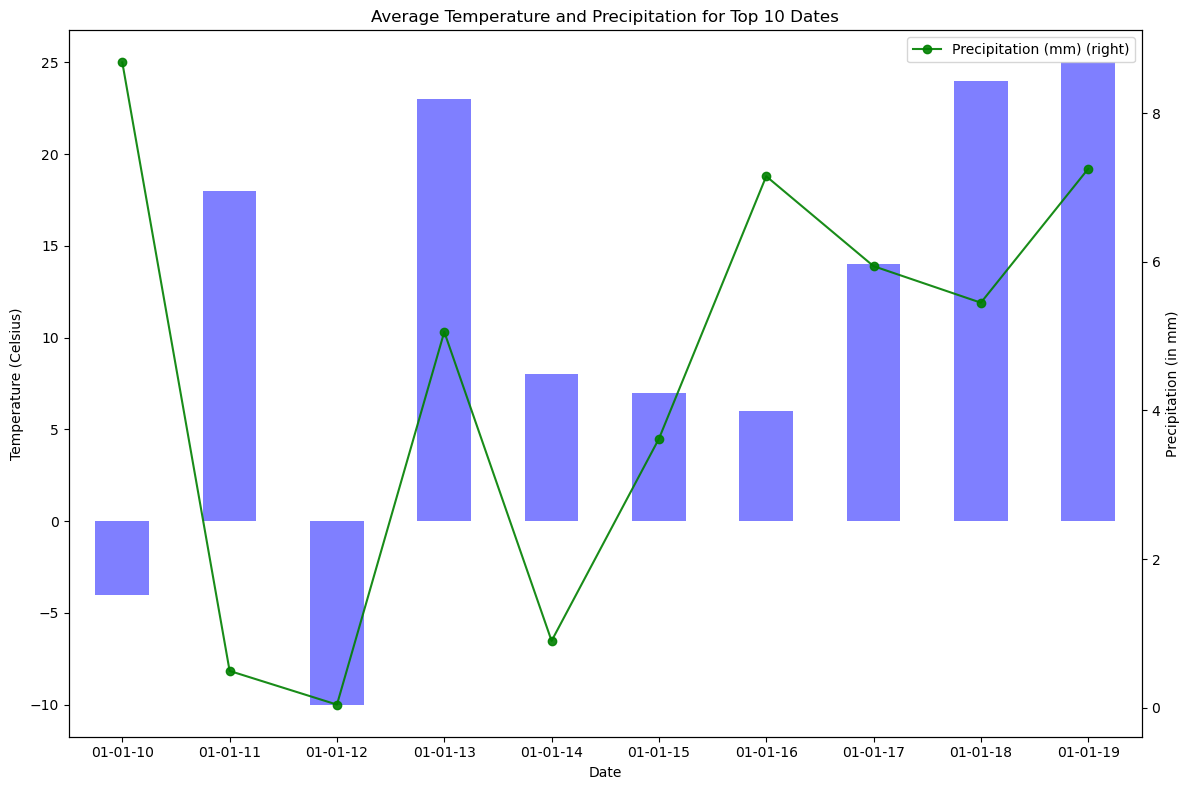

In [61]:
N = 10

top_dates_temp = avg_temp.head(N)
top_dates_precip = avg_precip.head(N)

plt.figure(figsize=(12,8))

axis = top_dates_temp.plot(kind='bar', color='blue', alpha=0.5, label="Temperature (Celsius)")

axis2 = top_dates_precip.plot(kind='line', color='green', marker='o', alpha=0.9, secondary_y=True, label="Precipitation (mm)")

axis.set_title(f"Average Temperature and Precipitation for Top 10 Dates")
axis.set_xlabel('Date')
axis.set_ylabel('Temperature (Celsius)')
axis2.set_ylabel('Precipitation (in mm)')

plt.xticks(rotation=45)
plt.tight_layout()
ax.legend(loc=2)  
axis2.legend(loc=1)  

plt.show()


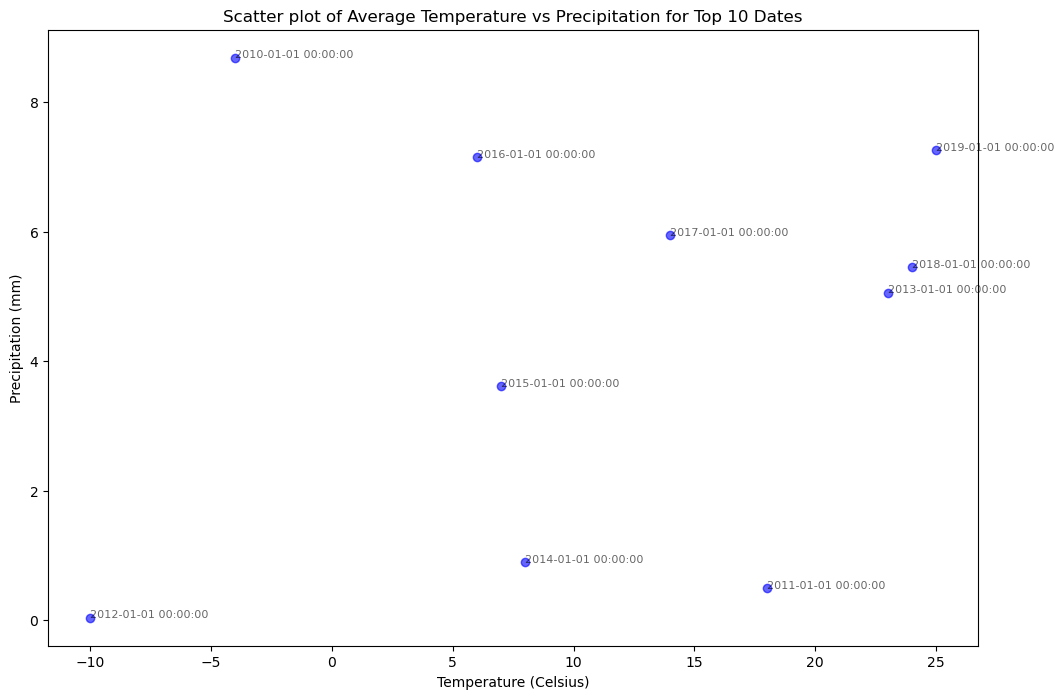

In [22]:
N = 10

top_dates_temp = avg_temp.head(N)
top_dates_precip = avg_precip.head(N)

plt.figure(figsize=(12,8))

plt.scatter(top_dates_temp, top_dates_precip, color='blue', alpha=0.6)

for date, temp, precip in zip(top_dates_temp.index, top_dates_temp.values, top_dates_precip.values):
    plt.annotate(date, (temp, precip), fontsize=8, alpha=0.6)

plt.title(f"Scatter plot of Average Temperature vs Precipitation for Top 10 Dates")
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Precipitation (mm)')
plt.show()


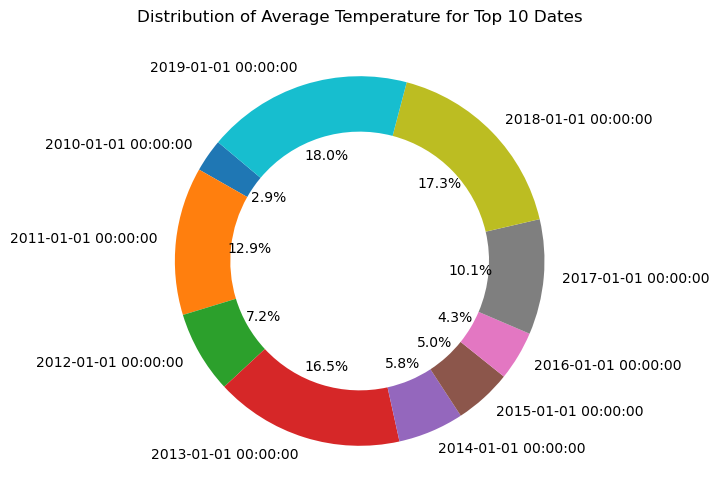

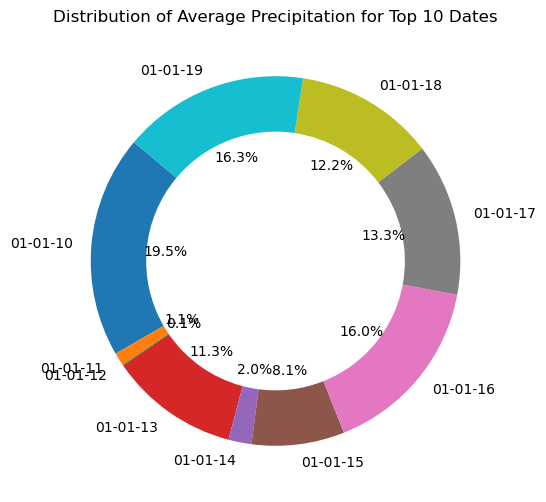

In [24]:
N = 10

top_dates_temp = avg_temp.head(N).abs()  # Converting to absolute values
top_dates_precip = avg_precip.head(N).abs()  

plt.figure(figsize=(12, 6))
plt.pie(top_dates_temp, labels=top_dates_temp.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title(f"Distribution of Average Temperature for Top {N} Dates")
plt.show()

plt.figure(figsize=(12, 6))
plt.pie(top_dates_precip, labels=top_dates_precip.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title(f"Distribution of Average Precipitation for Top {N} Dates")
plt.show()


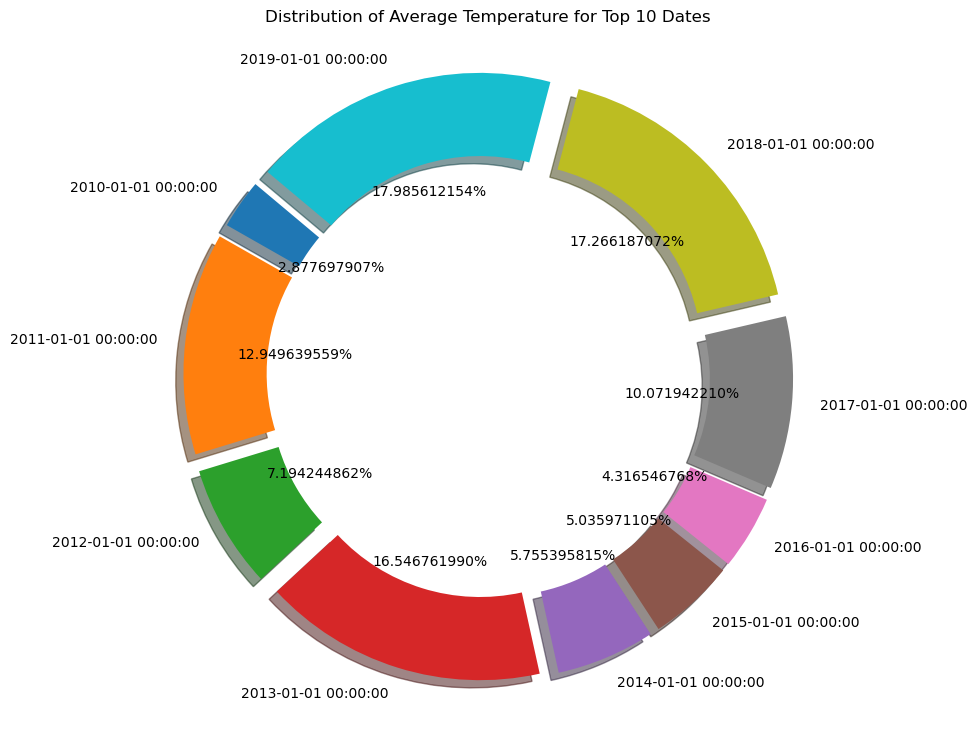

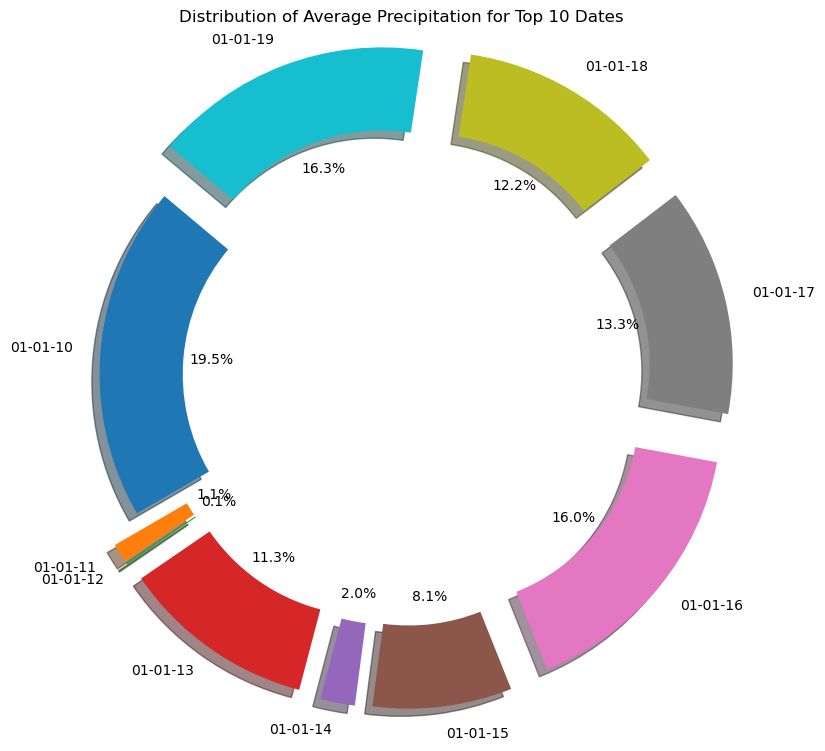

In [51]:
N = 10

top_dates_temp = avg_temp.head(N).abs()
top_dates_precip = avg_precip.head(N).abs()

explode_temp = [0.09] + [0.1] * (N - 1)
explode_precip = [0.09] + [0.2] * (N - 1)

plt.figure(figsize=(12, (9)))
plt.pie(top_dates_temp, labels=top_dates_temp.index, autopct='%1.9f%%', startangle=140, wedgeprops=dict(width=0.3),
        explode=explode_temp, shadow=True)
plt.title(f" Distribution of Average Temperature for Top 10 Dates")
plt.show()

plt.figure(figsize=(12, 9))
plt.pie(top_dates_precip, labels=top_dates_precip.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3),
        explode=explode_precip, shadow=True)
plt.title(f" Distribution of Average Precipitation for Top 10 Dates")
plt.show()


In [52]:
X = avg_temp.values.reshape(-1, 1)
y = avg_precip.values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
models = [("LinearRegression", LinearRegression()),
          ("Lasso", Lasso()),
          ("Ridge", Ridge())]

In [57]:
#to check if there's a linear relationship between temp and percipitation
for model_name, model in models:
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"{model_name} - Train Score: {train_score:.2f}, Test Score: {test_score:.2f}")

LinearRegression - Train Score: 0.00, Test Score: -0.00
Lasso - Train Score: 0.00, Test Score: -0.00
Ridge - Train Score: 0.00, Test Score: -0.00


In [85]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)


LinearRegression()

In [86]:
y_pred = linear_regressor.predict(X_test)


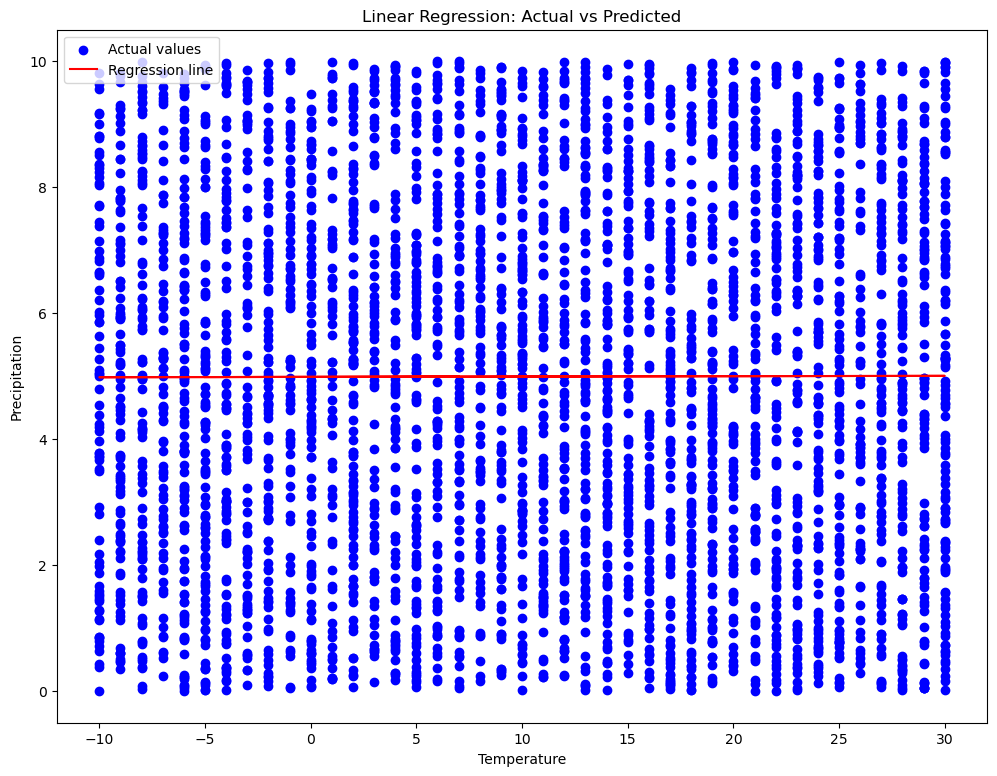

In [92]:
plt.figure(figsize=(12, 9))

plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', label='Regression line')

plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Temperature')
plt.ylabel('Precipitation')
plt.legend()
plt.show()

In [90]:
residuals = y_test - y_pred


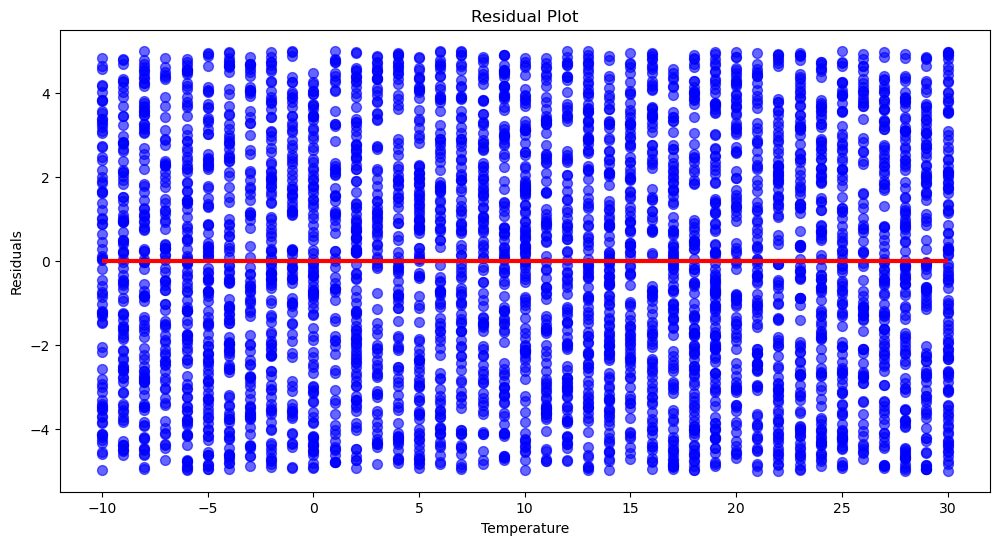

In [91]:
plt.figure(figsize=(12, 6))
plt.scatter(X_test, residuals, color='blue', s=50, alpha=.6)
plt.hlines(y=0, xmin=X_test.min(), xmax=X_test.max(), colors='red', linewidth=3)
plt.title('Residual Plot')
plt.xlabel('Temperature')
plt.ylabel('Residuals')
plt.show()

In [63]:
#Creating a decision tree to predict 

X = df[['avg_temp']]
y = df['avg_precip']

KeyError: "None of [Index(['avg_temp'], dtype='object')] are in the [columns]"

In [64]:
X = df[['Temperature (Celsius)']]
y = df['Precipitation (mm)']

In [66]:
avg_temp = df.groupby('Date')['Temperature (Celsius)'].mean()
avg_precip = df.groupby('Date')['Precipitation (mm)'].mean()


df_avg = pd.DataFrame({'avg_temp': avg_temp, 'avg_precip': avg_precip}).reset_index()

X = df_avg[['avg_temp']]
y = df_avg['avg_precip']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
regressor = DecisionTreeRegressor()


In [71]:
regressor.fit(X_train, y_train)


DecisionTreeRegressor()

In [72]:
train_preds = regressor.predict(X_train)
test_preds = regressor.predict(X_test)


In [80]:
print("Training Metrics:")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, train_preds)}")


print("\nTesting Metrics:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, test_preds)}")


Training Metrics:
Mean Absolute Error: 2.487235665797199

Testing Metrics:
Mean Absolute Error: 2.492967664254001


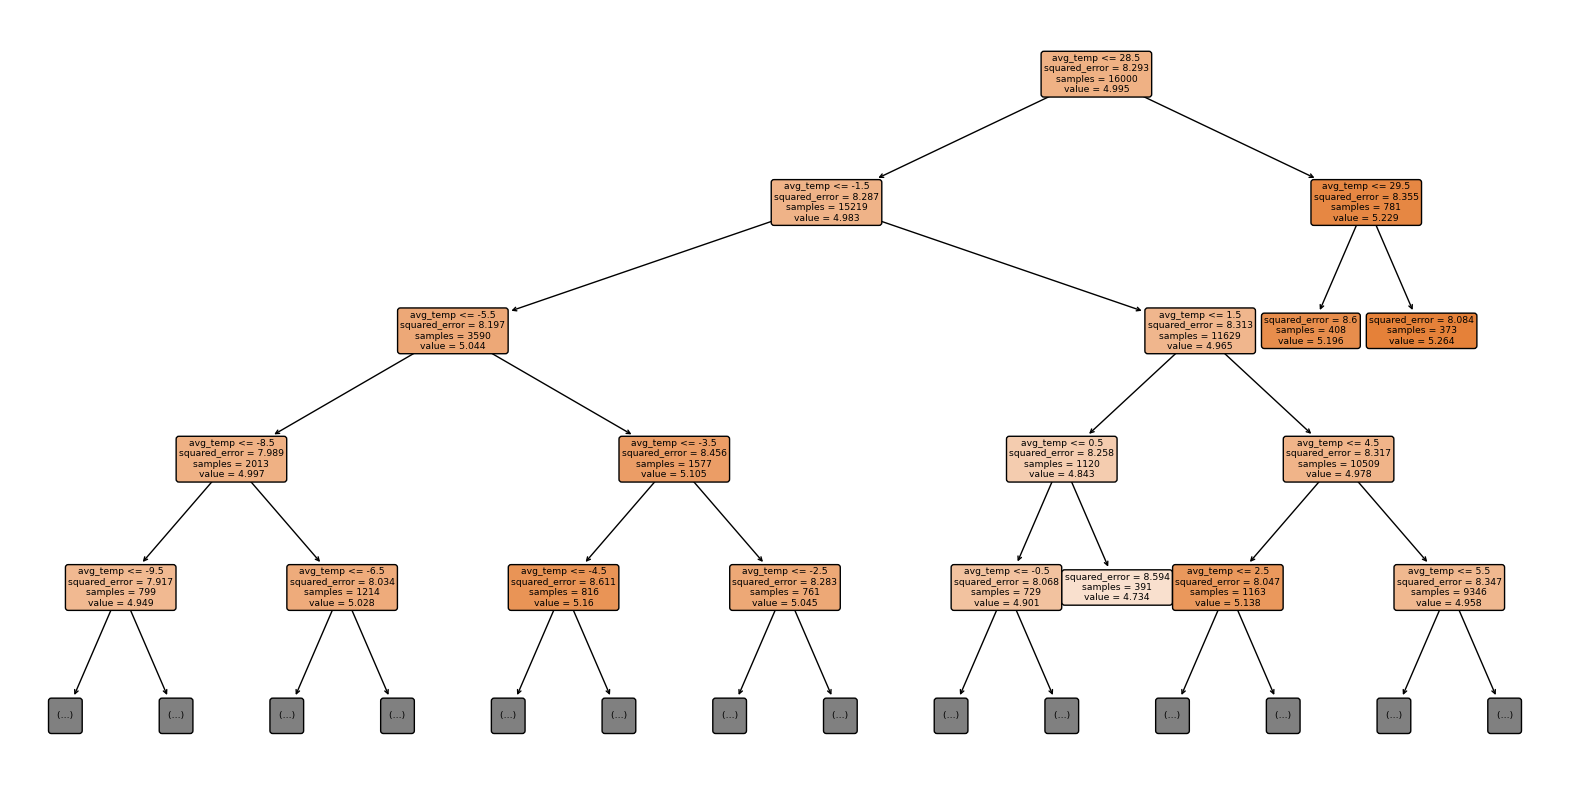

In [81]:
plt.figure(figsize=(20,10))
plot_tree(regressor, filled=True, feature_names=['avg_temp'], max_depth=4, rounded=True)
plt.show()

NameError: name 'dtree' is not defined

C:\Users\ksidk\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\ksidk\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


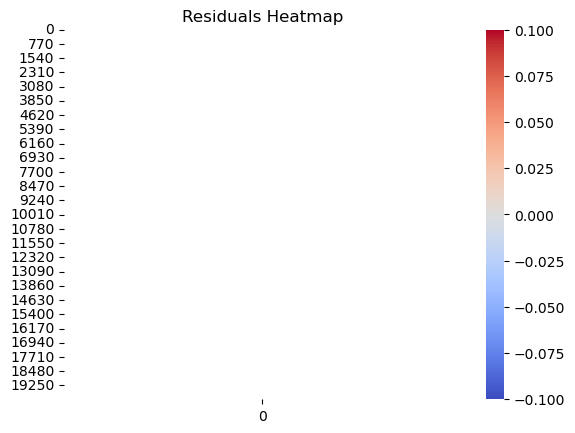

In [93]:
df.describe()

,S.No.,Temperature (Celsius),Temperature (Kelvin),Temperature (Fahrenheit),Precipitation (mm),Wind Speed (km/h)
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,9.984300,283.134300,49.971740,4.983424,24.892300
std,5773.647028,11.860607,11.860607,21.349092,2.882050,14.738964
min,1.000000,-10.000000,263.150000,14.000000,0.001016,0.000000
25%,5000.750000,0.000000,273.150000,32.000000,2.475521,12.000000
50%,10000.500000,10.000000,283.150000,50.000000,5.006267,25.000000
75%,15000.250000,20.000000,293.150000,68.000000,7.463667,38.000000
max,20000.000000,30.000000,303.150000,86.000000,9.999604,50.000000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   S.No.                     20000 non-null  int64  
 1   Date                      20000 non-null  object 
 2   Temperature (Celsius)     20000 non-null  int64  
 3   Temperature (Kelvin)      20000 non-null  float64
 4   Temperature (Fahrenheit)  20000 non-null  float64
 5   Precipitation (mm)        20000 non-null  float64
 6   Wind Speed (km/h)         20000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 1.1+ MB
